In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ROOT_DIR = '/content/drive/MyDrive/Smart Bus Vision'

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.6 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO
import os

model = YOLO("yolov8m.pt")
model.train(
    data = os.path.join(ROOT_DIR, "data", "data.yaml"),
    epochs=200,        # max epochs
    patience=30,       # early stopping
    imgsz=960,         # higher res = better small text
    batch=8,           # safe for Colab GPU
    cache=True,        # faster
    workers=2,
    hsv_h=0.015,       # light color aug
    hsv_s=0.4,
    hsv_v=0.4,
    degrees=0.0,
    translate=0.05,
    scale=0.5,
    mosaic=0.3,
    close_mosaic=10,   # turn off mosaic late
    pretrained=True
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Smart Bus Vision/data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.4, hsv_v=0.4, imgsz

KeyboardInterrupt: 

In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")

model.predict(
    source="/content/drive/MyDrive/Smart Bus Vision/data/val/images",
    save=True,
    conf=0.25,
    show_labels=False,   
    show_conf=False,     
    line_width=1        
)



image 1/197 /content/drive/MyDrive/Smart Bus Vision/data/val/images/bus_video1_279.jpg: 544x960 1 route_number, 1 destination, 44.5ms
image 2/197 /content/drive/MyDrive/Smart Bus Vision/data/val/images/bus_video1_280.jpg: 544x960 1 route_number, 1 destination, 38.6ms
image 3/197 /content/drive/MyDrive/Smart Bus Vision/data/val/images/bus_video1_281.jpg: 544x960 1 route_number, 1 destination, 27.3ms
image 4/197 /content/drive/MyDrive/Smart Bus Vision/data/val/images/bus_video1_282.jpg: 544x960 1 route_number, 1 destination, 27.3ms
image 5/197 /content/drive/MyDrive/Smart Bus Vision/data/val/images/bus_video1_283.jpg: 544x960 1 route_number, 1 destination, 27.4ms
image 6/197 /content/drive/MyDrive/Smart Bus Vision/data/val/images/bus_video1_284.jpg: 544x960 1 route_number, 1 destination, 27.3ms
image 7/197 /content/drive/MyDrive/Smart Bus Vision/data/val/images/bus_video1_285.jpg: 544x960 1 route_number, 1 destination, 27.3ms
image 8/197 /content/drive/MyDrive/Smart Bus Vision/data/val/

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'route_number', 1: 'destination'}
 obb: None
 orig_img: array([[[120, 115,  94],
         [120, 115,  94],
         [120, 115,  94],
         ...,
         [ 31,  61,  56],
         [ 31,  61,  56],
         [ 31,  61,  56]],
 
        [[118, 113,  92],
         [118, 113,  92],
         [118, 113,  92],
         ...,
         [ 31,  61,  56],
         [ 31,  61,  56],
         [ 31,  61,  56]],
 
        [[116, 111,  90],
         [116, 111,  90],
         [116, 111,  90],
         ...,
         [ 31,  61,  56],
         [ 31,  61,  56],
         [ 31,  61,  56]],
 
        ...,
 
        [[153, 159, 164],
         [155, 161, 166],
         [160, 166, 171],
         ...,
         [111, 112, 116],
         [120, 121, 125],
         [132, 133, 137]],
 
        [[140, 146, 151],
         [143, 149, 154],
         [148, 154, 159],
        

In [14]:
import pandas as pd

df = pd.read_csv('/content/runs/detect/train/results.csv')
print(df.columns)



Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2', 'lr/pg3', 'lr/pg4', 'lr/pg5', 'lr/pg6',
       'lr/pg7'],
      dtype='object')


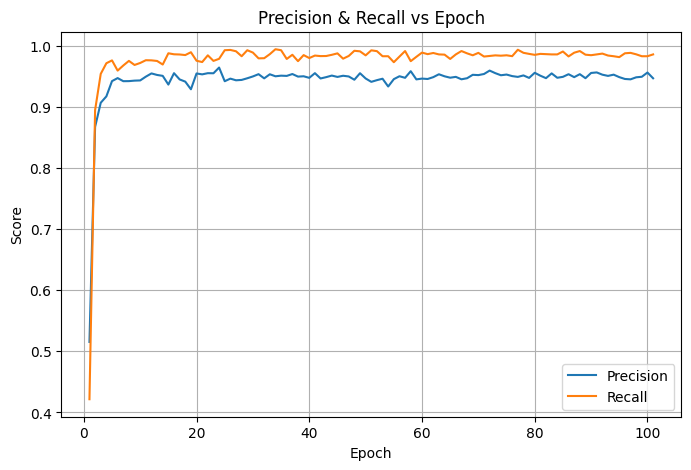

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Precision & Recall vs Epoch')
plt.legend()
plt.grid()
plt.show()


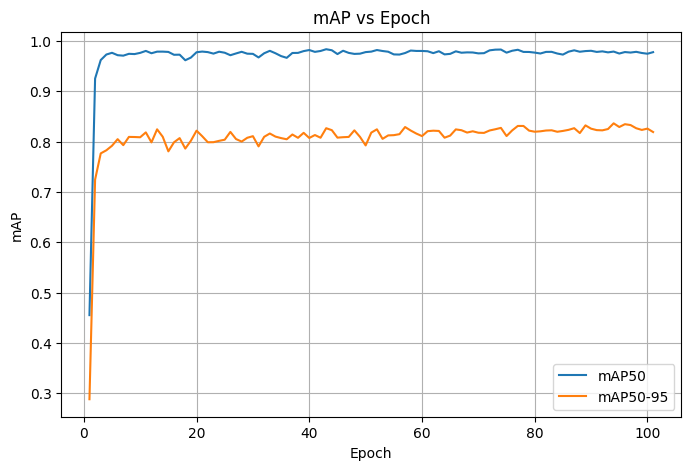

In [16]:
plt.figure(figsize=(8,5))
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP50')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP50-95')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('mAP vs Epoch')
plt.legend()
plt.grid()
plt.show()


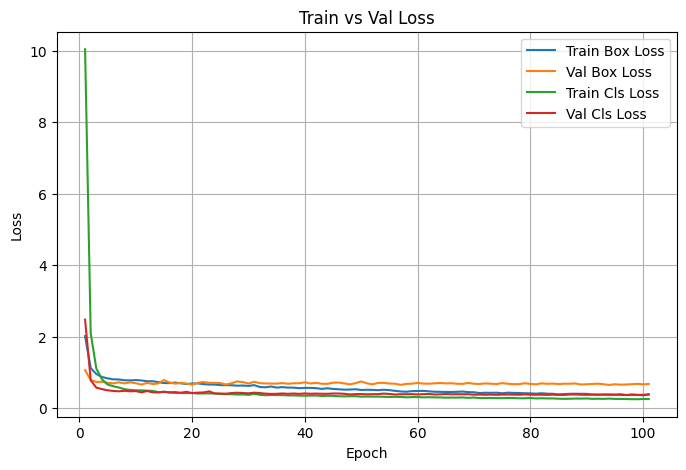

In [17]:
plt.figure(figsize=(8,5))
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')

plt.plot(df['epoch'], df['train/cls_loss'], label='Train Cls Loss')
plt.plot(df['epoch'], df['val/cls_loss'], label='Val Cls Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Val Loss')
plt.legend()
plt.grid()
plt.show()


In [18]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/best.pt')
model.val(data='/content/drive/MyDrive/Smart Bus Vision/data/data.yaml',
          save_conf=True,
          plots=True)


Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 93 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.7±0.3 ms, read: 22.5±15.6 MB/s, size: 106.6 KB)
val: Scanning /content/drive/MyDrive/Smart Bus Vision/data/val/labels.cache... 197 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 197/197 63.6Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 1.5it/s 8.5s
                   all        197        365      0.953      0.983      0.978      0.835
          route_number        195        197      0.968       0.99      0.987      0.839
           destination        167        168      0.938      0.976       0.97      0.832
Speed: 2.5ms preprocess, 29.6ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to /content/runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e76b4b75040>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804